# **Proyek Akhir : Klasifikasi Gambar Dicoding**

**Data Diri**


1.   Nama : Shadifa Auliatama Harjanto
2.   TTL : Pekalongan, 14 September 2001
3.   Email : bangshadif@gmail.com
4.   No.Telp : 082121157737

**Library yang Digunakan**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import History
import zipfile, os

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


**Input Dataset**

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-18 05:21:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.3MB/s    in 29s     

2021-07-18 05:21:57 (10.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Zip File Extraction**

In [3]:
# melakukan ekstraksi pada file zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

**Direktori yang akan digunakan**

In [4]:
os.listdir(base_dir)


['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

**Image Augmentation**

In [5]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap', 
                    validation_split = 0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)

In [6]:
train_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  
        shuffle = True,
        subset='training')
 
validation_generator = test_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150), 
        shuffle = True,  
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Model**

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Penggunaan Callback (Earlystopping dan history)

In [9]:
cb_earlyStop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10 
)


Epoch 1/10
16/16 [==============================] - 37s 312ms/step - loss: 1.0743 - accuracy: 0.3926 - val_loss: 1.0096 - val_accuracy: 0.3750
Epoch 2/10
16/16 [==============================] - 5s 296ms/step - loss: 0.8347 - accuracy: 0.6152 - val_loss: 0.4309 - val_accuracy: 0.8359
Epoch 3/10
16/16 [==============================] - 4s 284ms/step - loss: 0.4148 - accuracy: 0.8457 - val_loss: 0.4135 - val_accuracy: 0.8438
Epoch 4/10
16/16 [==============================] - 5s 288ms/step - loss: 0.3491 - accuracy: 0.8672 - val_loss: 0.2716 - val_accuracy: 0.9141
Epoch 5/10
16/16 [==============================] - 5s 300ms/step - loss: 0.2736 - accuracy: 0.9043 - val_loss: 0.2954 - val_accuracy: 0.8984
Epoch 6/10
16/16 [==============================] - 5s 286ms/step - loss: 0.2347 - accuracy: 0.9170 - val_loss: 0.2172 - val_accuracy: 0.9141
Epoch 7/10
16/16 [==============================] - 5s 297ms/step - loss: 0.3971 - accuracy: 0.8496 - val_loss: 0.2539 - val_accuracy: 0.9297
Epoch

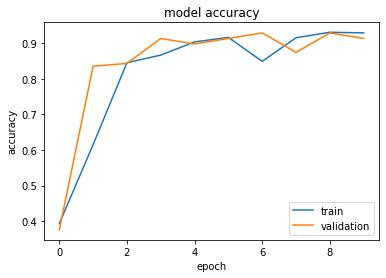

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=16, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=4,
      verbose=1,
      callbacks=[cb_earlyStop]
      )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

**Upload a File**

Saving kertas1.jpg to kertas1.jpg
paper


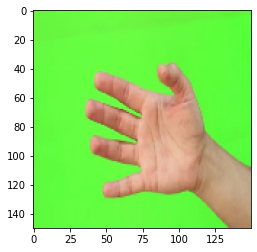

In [12]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')